# Alejandro Cano Moya
# Carlos Velez García

## Proyecto de programación "*Deep Vision in classification tasks*"


## Premisa

En esta actividad, se va a **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Se resolverá el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el/la alumnx utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

# Configuración hardware

In [ ]:
import tensorflow as tf

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Nov 17 07:15:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
print(f'GPUs disponibles:{len(tf.config.list_physical_devices("GPU"))}')

device = tf.test.gpu_device_name() if len(tf.config.list_physical_devices("GPU")) > 0 else "/device:CPU:0"

print(f'El entrenamiento se llevará acabo en: {device}')

GPUs disponibles:1
El entrenamiento se llevará acabo en: /device:GPU:0


# Introducción: Dog Breed Identification

Descripción de la competición [Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/overview) en kaggle:

_"Who's a good dog? Who likes ear scratches? Well, it seems those fancy deep neural networks don't have all the answers. However, maybe they can answer that ubiquitous question we all ask when meeting a four-legged stranger: what kind of good pup is that?_

_In this playground competition, you are provided a strictly canine subset of ImageNet in order to practice fine-grained image categorization. How well you can tell your Norfolk Terriers from your Norwich Terriers? With 120 breeds of dogs and a limited number training images per class, you might find the problem more, err, ruff than you anticipated."_

__El objetivo de la competición es crear un clasificador capaz de determinar la raza de un perro a partir de una foto.__

In [ ]:
# Conectamos con nuestro Google Drive
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta absoluta al directorio de mi Google Drive donde quiero almacenar el dataset.
MYDRIVE_BASE_FOLDER = 'SET_FOLDER' # Set folder in drive
dataset_folder = 'dog_breed_id_dataset'
mydrive_dataset_path = os.path.join(MYDRIVE_BASE_FOLDER, dataset_folder)
mydrive_dataset_path

In [ ]:
kaggle_json_path = os.path.join(MYDRIVE_BASE_FOLDER, 'kaggle.json')

if os.path.exists(kaggle_json_path):
  print(kaggle_json_path)
else:
  raise Exception('Error: kaggle.json file not found!')

# Descarga del conjunto de datos desde kaggle a Google Drive.




In [ ]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 4.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=c28fcd0b851c6c3f714c9b49002349e210743f3730cdac7848a89b2ffe00ee40
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp SET_FOLDER SET_FOLDER/kaggle.json ~/.kaggle/ #Set Folder!
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Descargamos el dataset de la competición dog-breed-identification
!kaggle competitions download -c dog-breed-identification

 99% 684M/691M [00:16<00:00, 51.1MB/s]
100% 691M/691M [00:16<00:00, 43.8MB/s]


In [ ]:
!mkdir ~/content/dog_breed_id_dataset
!unzip dog-breed-identification.zip -d /content/dog_breed_id_dataset

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/dog_breed_id_dataset/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: /content/dog_breed_id_dataset/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: /content/dog_breed_id_dataset/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: /content/dog_breed_id_dataset/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: /content/dog_breed_id_dataset/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: /content/dog_breed_id_dataset/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: /content/dog_breed_id_dataset/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: /content/dog_breed_id_dataset/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: /content/dog_breed_id_dataset/train/83fad0718581a696132c96c166472627.jpg  
  inflating: /content/dog_breed_id_dataset/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: /content/dog_breed_id_dataset/train/8403d89364

## Almacenamiento del dataset en mi google drive

<mark>Sólo es necesario ejecutar esta sección si no tenemos los datos ya en nuestro drive y queremos almacenarlos</mark>

In [ ]:
# Creamos el directorio donde guardaremos el dataset.
if not os.path.exists(mydrive_dataset_path):
  creado = os.makedirs(mydrive_dataset_path)
  if creado: 
    print(f'Creado directorio en "{mydrive_dataset_path}".')
  else:
    print(f'Error al crear el directorio "{mydrive_dataset_path}".')
else:
  print(f'El path "{mydrive_dataset_path}" ya existe.')

El path "/content/drive/MyDrive/Colab Notebooks/07_Redes_Neuronales/Act_parejas/dog_breed_id_dataset" ya existe.


In [ ]:
# Descomprimimos los datos y los dejamos listos para trabajar
# Nota: La ruta de destino es la de variable mydrive_dataset_path
!unzip dog-breed-identification.zip -d SET_FOLDER SET_FOLDER/dog_breed_id_dataset #Set folder

unzip:  cannot find or open dog-breed-identification.zip, dog-breed-identification.zip.zip or dog-breed-identification.zip.ZIP.


# **Carga** del conjunto de datos


In [ ]:
import pandas as pd
import numpy as np
import PIL
import PIL.Image
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Vemos la estructura de nuestro dataset:

In [ ]:
dataset_path = '/content/dog_breed_id_dataset'
os.path.exists(dataset_path)

True

In [ ]:
os.listdir(dataset_path)

['sample_submission.csv', 'train', 'test', 'labels.csv']

In [ ]:
train_dspath = os.path.join(dataset_path + '/train')
test_dspath = os.path.join(dataset_path + '/test')

print(f'Train dataset size: {len(os.listdir(train_dspath))}')
print(f'Test dataset size: {len(os.listdir(test_dspath))}')

Train dataset size: 10222
Test dataset size: 10357


In [ ]:
lbls_fpath = os.path.join(dataset_path + '/labels.csv')
lbls_data = pd.read_csv(lbls_fpath)

In [ ]:
lbls_data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


*   _id_: nombre de la imagen, sin la extensión (_'.jpg'_).
*   _breed_: raza del perro de la imagen, etiqueta a predecir. 




In [ ]:
labels = lbls_data['breed'].unique()
print(f'Las {len(labels)} razas diferentes son: {labels}')

Las 120 razas diferentes son: ['boston_bull' 'dingo' 'pekinese' 'bluetick' 'golden_retriever'
 'bedlington_terrier' 'borzoi' 'basenji' 'scottish_deerhound'
 'shetland_sheepdog' 'walker_hound' 'maltese_dog' 'norfolk_terrier'
 'african_hunting_dog' 'wire-haired_fox_terrier' 'redbone'
 'lakeland_terrier' 'boxer' 'doberman' 'otterhound' 'standard_schnauzer'
 'irish_water_spaniel' 'black-and-tan_coonhound' 'cairn' 'affenpinscher'
 'labrador_retriever' 'ibizan_hound' 'english_setter' 'weimaraner'
 'giant_schnauzer' 'groenendael' 'dhole' 'toy_poodle' 'border_terrier'
 'tibetan_terrier' 'norwegian_elkhound' 'shih-tzu' 'irish_terrier'
 'kuvasz' 'german_shepherd' 'greater_swiss_mountain_dog' 'basset'
 'australian_terrier' 'schipperke' 'rhodesian_ridgeback' 'irish_setter'
 'appenzeller' 'bloodhound' 'samoyed' 'miniature_schnauzer'
 'brittany_spaniel' 'kelpie' 'papillon' 'border_collie' 'entlebucher'
 'collie' 'malamute' 'welsh_springer_spaniel' 'chihuahua' 'saluki' 'pug'
 'malinois' 'komondor' 'a

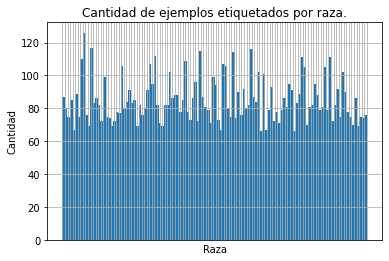

In [ ]:
lbls_data['breed'].hist(bins=len(labels))
plt.title('Cantidad de ejemplos etiquetados por raza.')
plt.ylabel('Cantidad')
plt.xlabel('Raza')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 

Se puede observar que la representación de cada clase en el dataset está balanceada, con una representación apróximada de unas 85 imágenes etiquetadas por raza.

__Data Augmentation__: En caso de necesitar reducir el overfitting de nuestro modelo, utilizaremos data augmentation como una de las técnicas de regularización. El objetivo es aumentar el conjunto de datos modificando de manera leve las imágenes originales. De esta forma, cada vez que se ejecute sobre el conjunto de train, este verá imágenes levemente modificadas. Utilizaremos un pipeline sencillo.

Introducir el [pipeline de data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) dentro del generador de datos, nos permitirá visualizar las imágenes es ligeramente modificadas, para contrastar que es el objetivo que queremos conseguir. Cabe mencionar, que esto pasa en la CPU por lo que es bastante lento a la hora de entrenar. Para paliar esto, pasaremos el pipeline de data augmentation al modelo a la hora de crearlo.

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_augmentation_pipeline = Sequential(
    [
        tf.keras.layers.RandomRotation(factor=0.15),
        tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        tf.keras.layers.RandomFlip("horizontal"),
    ],
    name="data_augmentation",
)

Creamos un custom [Data Generator](https://www.kaggle.com/mpalermo/keras-pipeline-custom-generator-imgaug) para cargar las imágenes:



In [ ]:
class DogBreedDG(tf.keras.utils.Sequence):

  def __init__(self, images_paths, labels, width=300, height=300, channels=3, batch_size=32, shuffle=False, labels2num_dict=None):
    self.labels = labels
    self.images_paths = images_paths
    self.height=height
    self.width=width
    self.channels=channels
    self.size=(height, width, channels)
    self.batch_size = batch_size
    self.shuffle = shuffle
    self.indexes = np.arange(len(self.images_paths))
    self.labels2num_dict = labels2num_dict
    self.on_epoch_end()

  def __len__(self):
    return int(np.ceil(len(self.images_paths) / self.batch_size))
  
  def on_epoch_end(self):
    """
    Actualiza los indices después de cada época.
    """
    if self.shuffle:
      np.random.shuffle(self.indexes)

  def _label_to_num(self, label):
    return float(self.labels2num_dict[label]) if label is not None else None

  def __getitem__(self, i):
    """
    Generar un batch de datos
    """
    batch_indexes = self.indexes[i*self.batch_size: (i+1)*self.batch_size]
    lbls = [self._label_to_num(self.labels[k]) for k in batch_indexes]
    imgs = [self._load_image(self.images_paths[k]) for k in batch_indexes]
    return np.array(imgs), np.array(lbls)

  def _load_image(self, path, resize=True, augmented=False):
    image = PIL.Image.open(path)
    image = tf.convert_to_tensor(np.asarray(image), dtype=tf.float32)
    if resize: image = tf.image.resize(image, size=(self.height, self.width))
    if augmented: 
      aug_image = data_augmentation_pipeline(tf.expand_dims(image, axis=0))
      image = aug_image[0]
    return image

  def show_samples(self, resized=False, augmented=False):
    idxs = np.random.randint(len(self.indexes), size=9)    
    lbls = np.array([self.labels[k] for k in idxs])
    imgs = [self._load_image(self.images_paths[k], resize=resized, augmented=augmented) for k in idxs]
    plt.figure(figsize=(10, 10))
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(imgs[i].numpy().astype("uint8"))
      label = lbls[i]
      plt.title(label)

Definimos una clase DataLoader que creará y gestionará los DataGenerators de los conjuntos de train, validation y test.



In [ ]:
class DataLoader:

  def __init__(self, dspath, validation_split=0.2, seed=42, batch_size=32):
    self.dspath = dspath
    self.trainds_path = os.path.join(dspath, 'train')
    self.testds_path = os.path.join(dspath, 'test')
    self.lbls_fpath = os.path.join(dspath, 'labels.csv')
    self.seed = seed
    self.batch_size=batch_size
    self.validation_split=validation_split
    self.labels2num_dict = self._maplabels_text_to_num(pd.read_csv(self.lbls_fpath)['breed'].unique().tolist())

    trainds, valds, testds = self._create_datagenerators(dspath, 
                                             validation_split=validation_split,
                                             seed=seed,
                                             batch_size=batch_size,
                                             labels2num_dict=self.labels2num_dict) 
    self.train = trainds
    self.valid = valds
    self.test = testds
    assert len(np.unique(self.train.labels)) == len(np.unique(self.valid.labels)), 'Cantidad de clases presentes en train y valid diferentes.'
    self.n_classes = len(np.unique(self.train.labels))

  def _maplabels_text_to_num(self, labels_list):
    key_list = sorted(labels_list)
    value_list = list(range(len(key_list)))
    labels2num_dict = dict(zip(key_list, value_list))

    return labels2num_dict

  def _create_datagenerators(self, dspath, validation_split=0.2, seed=42, batch_size=32, labels2num_dict=None):
    """Carga los datos en los generadores"""

    trainds_path = os.path.join(dspath, 'train')
    testds_path = os.path.join(dspath, 'test')

    #Train y Val
    lbls_fpath = os.path.join(dspath, 'labels.csv')
    lbls_data = pd.read_csv(lbls_fpath)
    train_paths = lbls_data['id'].apply(lambda x: os.path.join(trainds_path, x + '.jpg')).values
    train_lbls = lbls_data['breed'].values

    X_train, X_val, Y_train, Y_val = train_test_split(train_paths, train_lbls, test_size=validation_split, random_state=seed)
    train_data = DogBreedDG(X_train, Y_train, batch_size=batch_size, shuffle=True, labels2num_dict=labels2num_dict)
    val_data = DogBreedDG(X_val, Y_val, batch_size=batch_size, labels2num_dict=labels2num_dict)
  
    #Test
    test_paths = [os.path.join(testds_path, x) for x in os.listdir(testds_path)]
    test_lbls = [None] * len(test_paths)
    test_data = DogBreedDG(test_paths, test_lbls, batch_size=batch_size, labels2num_dict=None)
  
    return train_data, val_data, test_data

In [ ]:
VAL_SPLIT = 0.2
BATCH_SIZE = 32 # Si no cabe en gpu, bajar a 64, 32, 16 ...
SEED = 123

In [ ]:
dls = DataLoader(dataset_path, 
                 validation_split=VAL_SPLIT,
                 batch_size=BATCH_SIZE)

In [ ]:
print(f'Hay {len(dls.train)} batches de entrenamiento.')

Hay 256 batches de entrenamiento.


# **EDA** del conjunto de datos

Comprobamos que tanto en el conjunto de entrenamiento, como en el de validación. La representación de todas las razas existe y está balanceada.

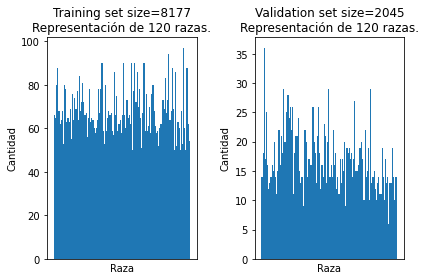

In [ ]:
fig, axs = plt.subplots(1,2)
axs[0].hist(dls.train.labels, bins=dls.n_classes)
axs[0].set_title(f'Training set size={len(dls.train.labels)}\nRepresentación de {dls.n_classes} razas.')
axs[0].set_ylabel('Cantidad')
axs[0].set_xlabel('Raza')
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
axs[1].hist(dls.valid.labels, bins=dls.n_classes)
axs[1].set_title(f'Validation set size={len(dls.valid.labels)}\nRepresentación de {dls.n_classes} razas.')
axs[1].set_ylabel('Cantidad')
axs[1].set_xlabel('Raza')
axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
fig.tight_layout() 

Los datasets están en general balanceados. A priori parece que algunas clases del conjunto de validación pueden tener menos representatividad, sin embargo, como utilizaremos este conjunto para obtener métricas sobre la calidad del entrenamiento, no deberíamos tener mayores problemas ya que la cantidad de muestras en cada raza si que es representativa.

#### Visualizamos el conjunto de datos

Obtenemos algunas imágenes al azar del conjunto de entrenamiento y las visualizamos.

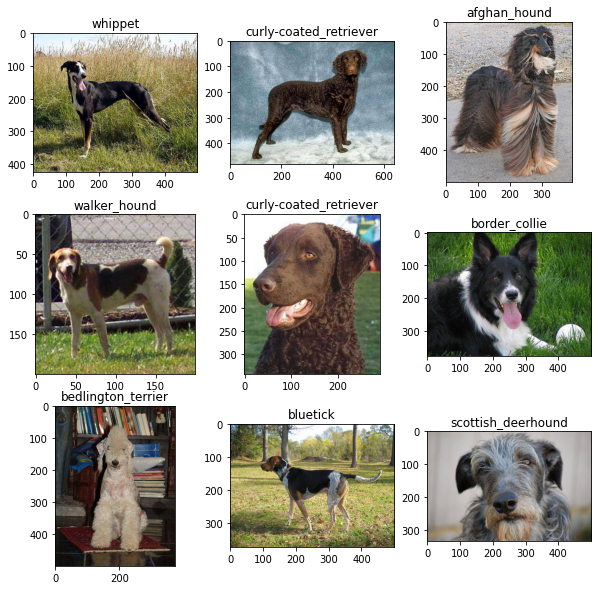

In [ ]:
dls.valid.show_samples()



*   En el batch podemos observar que tenemos imágenes de diferentes tamaños. Es necesario un __escalado__. Para ello, en nuestro DogBreedDG hemos definido una llamada al resize haciendo uso de `tf.image.resize`. Al crear el DataGenerator podemos pasarle el tamaño que queremos de las imágenes en los parámetros `height` y `width`, en nuestro caso trabajaremos con imágenes de 300x300 (ya parece suficiente resolución para nuestro clasificador). Comprobamos el resultado.



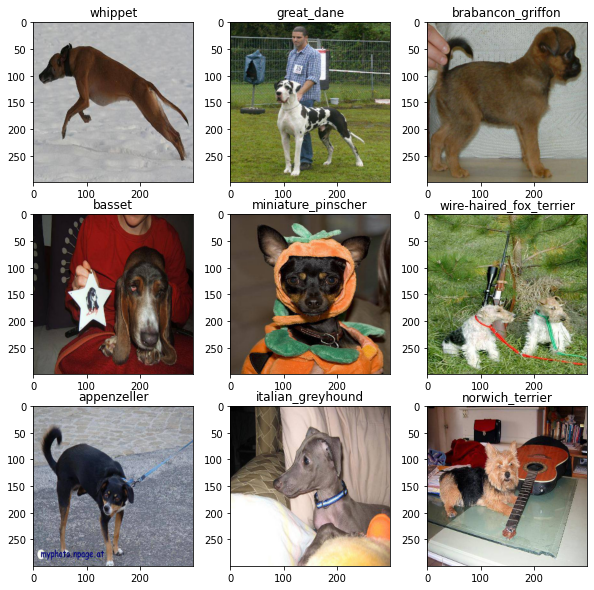

In [ ]:
dls.valid.show_samples(resized=True)

Ejecutando varias veces la celda anterior, a simple vista podemos observar que algunos ejemplos que pueden llegar a perjudicar el entrenamiento porque contienen fotos de perros junto a otros perros (con distinta raza), personas, texto por encima del perro, etc.

Por otra parte, veremos que al mostrar las imágenes del conjunto de train, podemos activar la opción de utilizar el __Pipeline de data augmentation__ al cargar la imágen. El resultado son imágenes volteadas, trasladadas o rotadas de forma aleatoria.

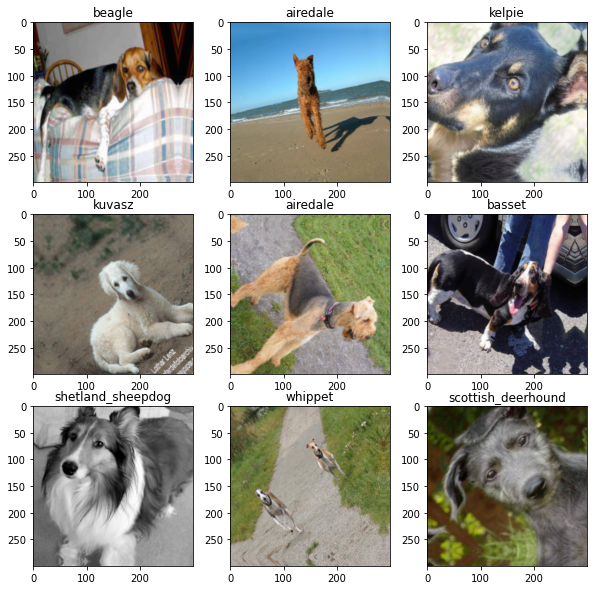

In [ ]:
dls.train.show_samples(resized=True, augmented=True)

# Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import pickle

In [ ]:
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, GlobalAveragePooling2D, Input, Add, Dense, Permute, Dropout

## From scratch

Al proponer una arquitectura de red neuronal desde cero para tareas de visión debemos tener en cuenta ciertos componentes (_building blocks_), que a día de hoy y hasta los límites de nuestro conocimiento, comparten la mayoría de arquitecturas del SOTA:
- __Capas Convolucionales__: entre otros, principalmente, su uso se justifica en la capacidad que tienen para tratar información espacial. Además su composición jerárquica permite aprender de forma jerárquica a detecar patrones más complejos mediante una combinación de patrones más simples aprendidas en capas previas. [Visualizing and Understanding Convolutional Networks](https://arxiv.org/pdf/1311.2901.pdf)
- __Bloques Residuales__: uno de los principales problemas en el entrenamiento de redes neuronales _muy_ profundas es el [_vanishing gradient_](https://es.wikipedia.org/wiki/Problema_de_desvanecimiento_de_gradiente). En 2015, se publicó el paper [_Deep Residual Learning for Image Recognition_](https://arxiv.org/abs/1512.03385v1) demostrando que el uso de bloques residuales lidiaba con dicho problema. En palabras del paper, con bloques residuales "explicítamente reformulan las capas para aprender funciones residuales con referencia a la entrada del bloque residual". La intuición es que es más fácil optimizar un mapeo residual que optimizar el mapeo original sin referencias.
- __Head Fully Connected__: en la literatura y también en esta asignatura hemos visto que para tareas de clasificación en visión, tras extraer las características complejas mediante una sucesión de capas convolucionales, se suele utilizar una serie de capas _fully connected_ para, a partir de esas características complejas ajustar la salida de nuestra red al número de clases que necesitamos predecir. En nuestro caso: 120 clases.

Basándonos en estos componentes principales, proponer una arquitectura desde 0 (_from scratch_) trataría básicamente de ajustar parámetros empríricamente como puede ser la profundidad de la red (por ejemplo, el número de bloques residuales sucesivos) o la composición de dichos bloques residuales. Además, otra práctica común sería emular la forma piramidal que adoptan la mayoría de redes, haciendo un _downsampling_ progresivo de las características (e.g. AlexNet, VGG, o ResNet), comprimiendo así la entrada inicial a dimensiones HxW menores.

Sin embargo, el 5 de Octubre de 2021, se publicó el paper (todavía en revisión) [Patches Are All You Need?](https://openreview.net/pdf?id=TVHS5Y4dNvM) donde se propone un modelo llamado __ConvMixer__, que a priori consigue mejorar el SOTA en ImageNet-1k, además de utilizar menor número de parámetros que sus competidores --del abstract del paper sacamos las ideas más destacables:

- Debido a la aparición de los Visual Transformers (ViT) y la complejidad cuadrática de las capas de Attention. Como paso previo, éstas necesitan el uso de [_patch embeddings_](https://arxiv.org/pdf/2105.01601.pdf) que agrupan pequeñas regiones de la imagen en características (1x1xh) sin _overlap_ entre ellas. El paper pretende contestar a la pregunta: ¿La _performance_ de los ViT se debe a la potente arquitectura de los transformers o parcialmente a la representación en patches?

- La idea del modelo ConvMixer es operar directamente sobre los patches como entrada, separar el _mixing_ espacial residual con [_Depthwise Convolutions_](https://paperswithcode.com/method/depthwise-convolution) y de canales con [_Pointwise Convolutions_](https://paperswithcode.com/method/pointwise-convolution) y mantener el tamaño y resolución durante toda la arquitectura.





Como red neuronal profunda entrenada _from scratch_, vamos a inspirarnos en la arquitectura del __ConvMixer__ por los siguientes motivos:
- __ConvMixer__ hace uso de los principales componentes que conforman las soluciones de visión que hemos listado al principio. 
- Es relativamente sencillo encontrar en kaggle soluciones que implementen ya modelos _from scratch_ con "forma piramidal" o de compresión. Sin embargo, dada la novedad de este tipo de arquitectura, todavía no hay implementaciones y resultados (hasta nuestro conocimiento), por lo menos en la página de nuestro dataset de kaggle.
- Evaluar de primera mano cómo se comporta este tipo de arquitectura en tareas de clasificación.


In [ ]:
class ConvMixer:

  def __init__(self, input_dim, hidden_dim, depth, kernel_size, patch_size, 
               n_classes):
    """
    Implementación basada en la arquitectura ConvMixer

    Args:
      input_dim: dimensiones de la entrada en formato (HxWxC).
      hidden_dim: dimensión de los patch_embeddings.
      depth: controla la profundidad del modelo (número de repeticiones del 
      bloque convmixer).
      patch_size: contra la resolución interna del modelo: HxW dividido entre 
      patch_size.
      kernel_size: tamaño del kernel en la convolución depthwise 
      (controla el mixing espacial) en el bloque convmixer.
      n_classes: cantidad de clases en la salida del modelo.
    """
    
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.depth = depth
    self.kernel_size = kernel_size
    self.patch_size = patch_size
    self.n_classes = n_classes

  def _patch_embedding(self, x, hidden_dim, patch_size):
    patch_embedding = Conv2D(filters=hidden_dim, kernel_size=patch_size, 
                             strides=patch_size, name='patch_embedding')
    x = patch_embedding(x)
    x = Activation('gelu')(x)
    x = BatchNormalization()(x)
    return x

  def _convmixer_block(self, x, hidden_dim, kernel_size, depth_idx):
    x0 = x #Guardamos el valor de x a la entrada del bloque residual
    depthwise_conv = Conv2D(filters=hidden_dim, kernel_size=kernel_size, 
                            padding='same', groups=hidden_dim, 
                            name=f'convmixer_block.depthwise_conv{depth_idx}')
    x = depthwise_conv(x)
    x = Activation('gelu')(x)
    x = BatchNormalization()(x)
    x = Add(name=f'convmixer_block.residual{depth_idx}')([x, x0]) #Conexion Residual
    pointwise_conv = Conv2D(filters=hidden_dim, kernel_size=1, 
                            name=f'convmixer_block.pointwise_conv{depth_idx}')
    x = pointwise_conv(x)
    x = Activation('gelu')(x)
    x = BatchNormalization()(x)
    return x

  def build(self, data_augmentation=None):
    model_in = Input(shape=self.input_dim, name='input')
    x = model_in
    # Metemos el data augmentation pipeline embebido en el modelo, de esta forma
    # aprovecharemos la gpu para generar las muestras. 
    if data_augmentation is not None:
      x = data_augmentation(x)
      
    # Preprocesado sobre imagenet: scala y normaliza
    x = tf.keras.applications.imagenet_utils.preprocess_input(x, mode='tf')

    # Generar los patch embeddings
    x = self._patch_embedding(x, hidden_dim=self.hidden_dim, 
                              patch_size=self.patch_size)
    # Encadenar los bloques convmixer
    for i in range(self.depth):
      x = self._convmixer_block(x, hidden_dim=self.hidden_dim, 
                                kernel_size=self.kernel_size, depth_idx=i)
    # Head fully connected
    x = GlobalAveragePooling2D()(x)
    model_out = Dense(units=n_classes, activation='softmax')(x)

    self.model = Model(model_in, model_out)

  def save(self, run_folders, id):
    with open(os.path.join(run_folders["model_path"], 
                           run_folders["exp_name"]+f'/{id}_model.pkl'),
              'wb') as f:
              pickle.dump([self.input_dim,
                           self.hidden_dim,
                           self.depth,
                           self.kernel_size,
                           self.patch_size,
                           self.n_classes], f)
  
    self.plot_model(run_folders, id)

  @staticmethod
  def load(self, run_folders, id):
    with open(os.path.join(run_folders["model_path"],
                           run_folders["exp_name"]+f'/{id}_model.pkl'), 
              'rb') as f:
              params = pickle.load(f)        
    convmixer = ConvMixer(*params)
    convmixer.build()
    convmixer.model.load_weights(
        os.path.join(run_folders["model_path"], 
        run_folders["exp_name"]+f'/weights/{id}_weights.h5'))
    return convmixer

  def plot_model(self, run_folders, id):
    plot_model(self.model, to_file=os.path.join(run_folders["model_path"], 
                                                run_folders["exp_name"]+f'/viz/{id}.png'),
                show_shapes=True, show_layer_names=True)



Una vez tenemos nuestra arquitectura del convmixer definida, generamos un modelo de ejemplo, no muy profundo, y lo visualizamos para comprobar que se genera como queremos.

Los argumentos del modelo:
- `input_dim`: dimensiones de la entrada en formato (HxWxC).
- `hidden_dim`: dimensión de los patch_embeddings.
- `depth`: controla la profundidad del modelo (número de repeticiones del bloque convmixer).
- `patch_size`: contra la resolución interna del modelo: HxW dividido entre patch_size. En el paper reportan varias pruebas y determinan que un valor de 7 obtiene buenos resultados. 
- `kernel_size`: tamaño del kernel en la convolución depthwise (controla el mixing espacial) en el bloque convmixer. A diferencia de lo establecido como buena práctica en la literatura (kernel_size=3x3) en este paper demuestran que esta arquitectura se beneficia de un kernel de mayor tamaño (9x9), y argumentan que es debido a que se tiene en cuenta un mayor campo receptivo durante el mixing espacial.

- `n_classes`: cantidad de clases a predecir en la salida del modelo.

In [ ]:
input_dim = dls.train.size
hidden_dim = 10
depth = 2
patch_size = 7
kernel_size = 9
n_classes = dls.n_classes

convmixer = ConvMixer(input_dim, hidden_dim, depth, kernel_size, patch_size, n_classes)

In [ ]:
convmixer.build(data_augmentation=data_augmentation_pipeline)

In [ ]:
convmixer.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 300, 300, 3)  0          ['input[0][0]']                  
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 300, 300, 3)  0           ['data_augmentation[0][0]']      
                                                                                                  
 tf.math.subtract (TFOpLambda)  (None, 300, 300, 3)  0           ['tf.math.truediv[0][0]']    

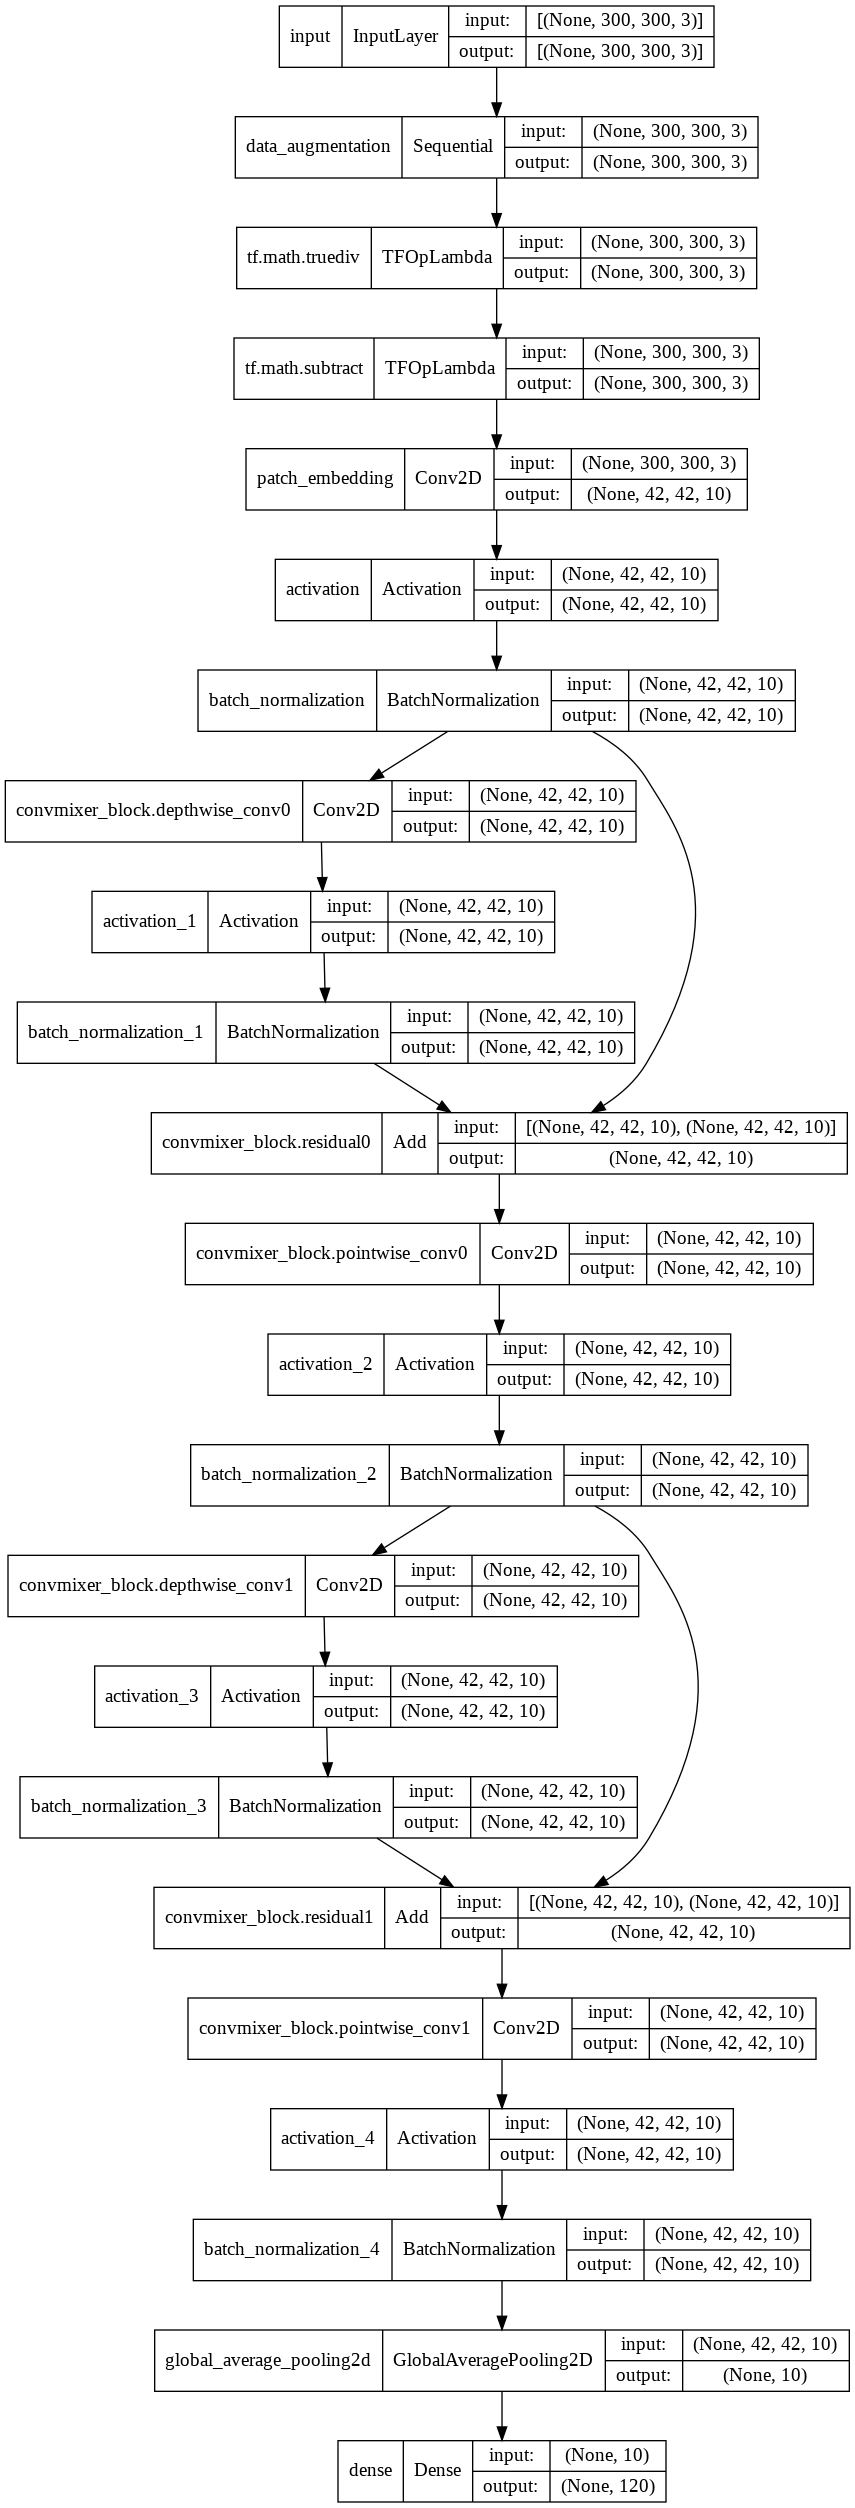

In [ ]:
plot_model(convmixer.model, show_shapes=True, show_layer_names=True)

En la imágen superior podemos comprobar que se genera la arquitectura que esperamos:

<img src="https://i.imgur.com/yF8actg.png" />
<figcaption>Source: extraída del paper ConvMixer</figcaption>


Regularización (BatchNorm and Dropout): https://www.kdnuggets.com/2018/09/dropout-convolutional-networks.html

## Clase Pretrained Model

La clase PretrainedModel tiene el objetivo de facilitarnos la creación de modelos preentrenados. Para ello hay que pasarle una arquitectura base (de las disponibles en [Keras Applications](https://keras.io/api/applications/), y unas dimensiones de entrada y salida del modelo. Por el momento, el head que se añade al modelo es fijo para todos los pre-trained aunque se podría modificar con cierta facilidad para aceptar un _custom head_ (en el caso de que fuese necesario).


In [ ]:
archs_dict = {
    "Xception": (tf.keras.applications.Xception, tf.keras.applications.xception.preprocess_input),
    "ResNet50V2": (tf.keras.applications.ResNet50V2, tf.keras.applications.resnet_v2.preprocess_input),
    "VGG16": (tf.keras.applications.VGG16, tf.keras.applications.vgg16.preprocess_input)
}


Adicionalmente, incorpora los métodos `freeze` y `unfreeze` que utilizaremos para congelar y descongelar el modelo durante el loop de entrenamiento (explicado en detalle en la sección 5.2).

In [ ]:
class PretrainedModel:

  def __init__(self, input_dim, base_model_arch, n_classes):
    """
    Clase que facilita llevar a cabo la transferencia de aprendizaje y 
    comparativa entre distintos modelos pre-entrenados.

    Args:
      input_dim: dimensiones de la entrada en formato (HxWxC).
      base_model_arch: arch del modelo pre-entrenado que utilizaremos como backend.
      n_classes: cantidad de clases en la salida del modelo.
    """
    
    self.input_dim = input_dim
    self.base_model_arch_name = base_model_arch
    self.base_model_arch, self.base_model_preprocessing = archs_dict[base_model_arch]
    self.n_classes = n_classes
    self.model = None
    self.base_model = None

  def freeze(self):
    """Congela los pesos de nuestro base_model"""
    if self.base_model is not None:
      self.base_model.trainable = False
      
      #Nos aseguramos que el base model esta congelado.
      assert self.base_model.trainable == False
      assert self.base_model.layers[0].trainable == False

  def unfreeze(self):
    """Descongela los pesos de nuestro base_model"""
    if self.base_model is not None:
      self.base_model.trainable = True
      
      #Nos aseguramos que el base model esta descongelado.
      assert self.base_model.trainable == True
      assert self.base_model.layers[0].trainable == True

  def build(self, use_dropout=True, data_augmentation=None):
    model_in = Input(shape=self.input_dim, name='input')
    x = model_in
    # Metemos el data augmentation pipeline embebido en el modelo, de esta forma
    # aprovecharemos la gpu para generar las muestras. 
    if data_augmentation is not None:
      x = data_augmentation(x)
    # Capa de preprocesado proveniente del modelo. 
    x = self.base_model_preprocessing(x)

    # Creamos el base_model
    # Cargamos los pesos pre-entrenados en ImageNet (además es ideal porque 
    # nuestro dataset es un subset de ImageNet).
    # Sólo cogemos el backend, no la head.
    self.base_model = self.base_model_arch(weights='imagenet', 
                                           input_shape=self.input_dim,
                                           include_top=False)
    
    x = self.base_model(x)
    # Head fully connected
    x = GlobalAveragePooling2D()(x)
    if use_dropout:
      x = Dropout(0.2)(x)  # Regularización con Dropout
    model_out = Dense(units=n_classes, activation='softmax')(x)

    self.model = Model(model_in, model_out)

  def save(self, run_folders, id):
    with open(os.path.join(run_folders["model_path"], run_folders["exp_name"]+f'/{id}_model.pkl'), 'wb') as f:
      pickle.dump([self.input_dim,
                   self.base_model_arch_name,
                   self.n_classes], f)
  
    self.plot_model(run_folders, id)

  @staticmethod
  def load(run_folders, id):
    with open(os.path.join(run_folders["model_path"], run_folders["exp_name"]+f'/{id}_model.pkl'), 'rb') as f:
        params = pickle.load(f)
        params[1] = 'ResNet50V2'
    pretrained = PretrainedModel(*params)
    pretrained.build()
    pretrained.model.load_weights(os.path.join(run_folders["model_path"], run_folders["exp_name"]+f'/weights/{id}_weights.h5'))
    return pretrained

  def plot_model(self, run_folders, id):
    plot_model(self.model, to_file=os.path.join(run_folders["model_path"], run_folders["exp_name"]+f'/viz/{id}.png'), show_shapes=True, show_layer_names=True)


### 4.2.1 ResNet50V2 Pre-trained Model



El primer modelo que vamos a utilizar para realizar la transferencia de aprendizaje es una [ResNet50V2](https://keras.io/api/applications/resnet/#resnet50v2-function). De las características de la tabla de Keras podemos extraer:

- Top-1 Accuracy: 0.749
- Top-5 Accuracy: 0.921
- \# Parameters: 25.636.712
- Time (ms) per inference step (CPU): 58.20
- Time (ms) per inference step (GPU): 4.55
- Size: 98 MB

Como podemos observar, este modelo tiene una cantidad de parámetros mucho mayor a la red que hemos propuesto para entrenar from scratch. Esto, además del hecho de estar pre-entrenado debería verse reflejado en la accuracy que obtengamos sobre el dataset.

*Nota: previamente, ya se cuenta con cierta experiencia utilizando este modelo y la ResNet34 (< # Parametros) para tareas de _transfer learning_ haciendo uso de la librería fastai y Pytorch. Se han conseguido buenos resultados y por ello se ha decidido utilizar para este proyecto.

In [ ]:
input_dim = dls.train.size
base_arch = "ResNet50V2"
n_classes = dls.n_classes

resnet50 = PretrainedModel(input_dim=input_dim, 
                           base_model_arch=base_arch,
                           n_classes = n_classes)

In [ ]:
resnet50.build(data_augmentation=data_augmentation_pipeline)

In [ ]:
resnet50.model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 300, 300, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 300, 300, 3)      0         
 al)                                                             
                                                                 
 tf.math.truediv (TFOpLambda  (None, 300, 300, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 300, 300, 3)      0         
 a)                                                              
                                                                 
 resnet50v2 (Functional)     (None, 10, 10, 2048)      23564800  
                                                             

### 4.2.2 Xception Pre-trained Model 

El primer modelo que vamos a utilizar para realizar la transferencia de aprendizaje es una [Xception](https://keras.io/api/applications/xception/). De las características de la tabla de Keras podemos extraer:

- Top-1 Accuracy: 0.790
- Top-5 Accuracy: 0.945
- \# Parameters: 22.910.480
- Time (ms) per inference step (CPU): 109.42
- Time (ms) per inference step (GPU): 8.06
- Size: 88 MB 

Como podemos observar, este modelo tiene una cantidad de parámetros mucho mayor a la red que hemos propuesto para entrenar from scratch. Esto, además del hecho de estar pre-entrenado debería verse reflejado en la accuracy que obtengamos sobre el dataset.

Se ha decidido escoger este modelo porque cuenta con características similares a la de la ResNet. 

In [ ]:
input_dim = dls.train.size
base_arch = "Xception"
n_classes = dls.n_classes

xception = PretrainedModel(input_dim=input_dim, 
                           base_model_arch=base_arch,
                           n_classes = n_classes)

In [ ]:
xception.build(data_augmentation=data_augmentation_pipeline)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
xception.model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 300, 300, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 300, 300, 3)      0         
 al)                                                             
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 300, 300, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 300, 300, 3)      0         
 bda)                                                            
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                           

# **Monitorización** del proceso de **entrenamiento** para la toma de decisiones



## Preparativos del entrenamiento

### Clase Learner

Dado que uno de los objetivos del proyecto es realizar una comparación y análisis entre diferentes arquitecturas entrenadas _from scratch_ y _pre-trianed_, vamos a crear la clase __Learner__.

La funcionalidad de esta clase estará inspirada en la que implementa la librería [_fastai_](https://docs.fast.ai/learner.html#Learner) sobre PyTorch. En nuestro caso, la implementación será en TensorFlow.

La clase Learner se encargará de agrupar un modelo, un conjunto de datasets ( train, validation, test), una función de pérdidas y un optimizador para poder llevar a cabo un entrenamiento. Adicionalmente, se añadirán una serie de métricas que nos permitan visualizar y monitorizar el proceso de entrenamiento.

Centralizar el código en esta clase nos permitirá reutilizar funcionalidades y ahorrar tiempo, para poder centrarnos en lo importante: el proceso de entrenamiento.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger, EarlyStopping
from datetime import datetime

In [ ]:
class Learner:
  
  def __init__(self, dataloaders, model, loss_function, optimizer, learner_name, monitoring_path):
    self.dls = dataloaders
    self.model = model
    self.loss_function = loss_function
    self.optimizer = optimizer
    self.history = None
    self.learner_id = f'{learner_name}_{self._get_timestamp()}'
    self.monitoring_path = monitoring_path

  def _get_timestamp(self):
    return int(datetime.timestamp(datetime.now()))

  def _create_monitoring_folders(self):
    """
    Crea entramado de directorios para guardar los resultados de un entrenamiento.
    """
    self.run_folders = {
               "learner_id": self.monitoring_path + f"/training_data/{self.learner_id}/",
               "model_path": self.monitoring_path + f"/training_data/{self.learner_id}/Models/", 
               "results_path": self.monitoring_path + f"/training_data/{self.learner_id}/Results/", 
               "log_filename": self.monitoring_path + f"/training_data/{self.learner_id}/Results/log/{self.learner_id}.log"
               }
    
    # Creating base folders
    try:
      path = self.run_folders["learner_id"]
      if not os.path.exists(path):
        os.mkdir(path)
    except:
      raise Exception('[Error]: fallo al crear los directorios de monitorización.')
    try:
      path = self.run_folders["model_path"]
      if not os.path.exists(path):
        os.mkdir(path)
    except:
      raise Exception('[Error]: fallo al crear los directorios de monitorización.')
    try:
      path = self.run_folders["results_path"]
      if not os.path.exists(path):
        os.mkdir(path)
    except:
      raise Exception('[Error]: fallo al crear los directorios de monitorización.')
    try:
      path = os.path.join(self.run_folders["results_path"], 'log')
      if not os.path.exists(path):
        os.mkdir(path)
    except:
      raise Exception('[Error]: fallo al crear los directorios de monitorización.')

    # Preparing required I/O paths for each experiment
    if len(os.listdir(self.run_folders["model_path"])) == 0:
        exp_idx = 1
    else:
        exp_idx = len(os.listdir(self.run_folders["model_path"])) + 1

    exp_name = "exp_%04d" % exp_idx
    self.run_folders["exp_name"] = exp_name

    exp_model_folder = self.run_folders["model_path"] + self.run_folders["exp_name"] + '/'
    exp_res_model = self.run_folders["results_path"] + self.run_folders["exp_name"] + '/'

    try:
        os.mkdir(exp_model_folder)
    except:
        raise Exception('[Error]: fallo al crear los directorios de monitorización.')

    try:
        os.mkdir(exp_res_model)
    except:
        raise Exception('[Error]: fallo al crear los directorios de monitorización.')
    try:
        os.mkdir(os.path.join(exp_model_folder, 'viz'))
    except:
        raise Exception('[Error]: fallo al crear los directorios de monitorización.')
    try:
        os.mkdir(os.path.join(exp_model_folder, 'weights'))
    except:
        raise Exception('[Error]: fallo al crear los directorios de monitorización.')
    try:
        os.mkdir(os.path.join(exp_model_folder, 'images'))
    except:
        raise Exception('[Error]: fallo al crear los directorios de monitorización.')

  def compile(self, learning_rate, weight_decay):
    self.learning_rate = learning_rate
    self.weight_decay = weight_decay
    self.optim = self.optimizer(learning_rate=learning_rate, weight_decay=weight_decay)
    self.model.model.compile(optimizer=self.optim,
                             loss=self.loss_function,
                             metrics=['accuracy'])



  def fit(self, n_epochs, learning_rate, weight_decay, plot_history=True):
    """
    Ajusta los datos de training a sus etiquetas durante un numero de épocas
    con una tasa de aprendizaje dada y otros parámetros.
  
    Args:
      n_epochs: numero total de epochs a ejecutar.
      learning_rate: tasa de aprendizaje.
      weight_decay: tasa de weight decay (regularizacion) 
    
    NOTA1: Hemos incluido el compilado dentro del fit del learner porque:
    - Nos permite entrenar cambiando el learning_rate de forma cómoda durante un
    número determinado de épocas.
    - Como para realizar la transferencia de aprendizaje, se va a 
    entrenar los modelos a veces parcialemente congelados, necesitaremos 
    compilar cada modelo antes de realizar el fit para asegurarnos que el
    entrenamiento sigue el comportamiento que queremos. De esta manera, por 
    comodidad y para evitar que se nos olvide realizar el paso de compilación,
    lo hemos integrado dentro del fit del learner.
    """
    # Creamos los monitoring folders para el experimento
    self._create_monitoring_folders()

    # Compilar el modelo
    self.compile(learning_rate, weight_decay)

    # Utilidades monitorización entrenamiento.
    csv_logger = CSVLogger(self.run_folders["log_filename"])
    checkpoint = ModelCheckpoint(os.path.join(self.run_folders["model_path"], self.run_folders["exp_name"]+f'/weights/{self.learner_id}_weights.h5'), save_weights_only=True, verbose=1)
    early_stop = EarlyStopping(monitor='val_loss', patience=25)
    lr_sched = self.step_decay_schedule(initial_lr=self.learning_rate, decay_factor=1, step_size=1)
    callbacks_list = [csv_logger, checkpoint, lr_sched, early_stop]

    # Fit
    with tf.device(device):
      self.history = self.model.model.fit(self.dls.train,
                                          epochs=n_epochs,
                                          validation_data=self.dls.valid,
                                          callbacks=callbacks_list)
    # Guardamos entrenamiento
    self.model.save(self.run_folders, self.learner_id)
    if plot_history:
      self.plot_last_fit_learning_curve()
  
  def step_decay_schedule(self, initial_lr, decay_factor=1, step_size=1):
    def schedule(epoch):
      new_lr = initial_lr * (decay_factor ** np.floor(epoch/step_size))
      return new_lr
    return LearningRateScheduler(schedule)

  def plot_last_fit_learning_curve(self):
    if self.history is not None:
      plt.figure()
      plt.plot(self.history.history['loss'])
      plt.plot(self.history.history['val_loss'])
      plt.axis([0, self.history.epoch[-1], 0, max(self.history.history['loss'] + self.history.history['val_loss'])])
      plt.legend(['loss', 'val_loss'], loc='upper right')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.savefig(self.run_folders["model_path"] + self.run_folders["exp_name"]+"/viz/"+"training_loss.png")
      plt.show()
    else:
      raise Exception('No existen datos de ningún entrenamiento')

  def freeze(self):
    """En caso de tener un modelo pre-entrenado, lo congela."""
    freeze_method = getattr(self.model, "freeze", None)
    if callable(freeze_method):
      self.model.freeze()
    else:
      print('El modelo no es instancia de la clase PretrainedModel.')

  def unfreeze(self):
    """En caso de tener un modelo pre-entrenado, lo descongela."""
    unfreeze_method = getattr(self.model, "unfreeze", None)
    if callable(unfreeze_method):
      self.model.unfreeze()
    else:
      print('El modelo no es instancia de la clase PretrainedModel.')
  
  def lr_find(self, learning_rate, weight_decay):
    self.compile(learning_rate, weight_decay)
    lr_finder = LRFinder(self.model.model)
    lr_finder.find_generator(generator=self.dls.train, start_lr=0.000001, end_lr=1, epochs=5)
    lr_finder.plot_loss()

### Optimizador

Como optimizador utilizaremos [AdamW](https://towardsdatascience.com/why-adamw-matters-736223f31b5d). La idea (demostrada por sus creadores experimentalmente) es que utizando el optimizador AdamW (Adam con regularización L²) se consiguen _mejores_ pérdidas y generaliza mucho mejor que los modelos entrenados con Adam, lo que le permite competir con SGD + momentum en resultados pero con una eficiencia de datos mayor.

Para hacer uso de este optimizador, necesitamos instalar las TensorFlow Addons:  


In [ ]:
! pip install -U -q tensorflow-addons

     |████████████████████████████████| 1.1 MB 13.2 MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
optimizer = tfa.optimizers.AdamW

### Función de pérdidas

Como hemso visto en clase, al realizar un modelo de clasificación multiclase se suele utilizar la función función de pérdidas [_Cross Entropy_](https://machinelearningmastery.com/cross-entropy-for-machine-learning/). Concretamente utilizaremos una implementación de Keras para esta función de pérdidas [SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), dado que se ajusta a como hemos decidido cargar las etiquetas en nuestro DataGenerator.

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
loss_function = SparseCategoricalCrossentropy()

### Learning Rate Finder

Para agilizar la búsqueda del valor óptimo de learning rate, utilizaremos una implementación de la sección 3 del paper ["Cyclical Learning Rates for Training Neural Networks"](https://arxiv.org/pdf/1506.01186.pdf) de Leslie N. Smith. La implementación está basada en la de la librería de fastai, y adaptada para poder ser utilizada en Keras. Para más detalles, consultar el github de la implementación del paquete: [keras_lr_finder](https://github.com/surmenok/keras_lr_finder). 

In [ ]:
! git clone https://github.com/surmenok/keras_lr_finder.git

Cloning into 'keras_lr_finder'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 68 (delta 1), reused 0 (delta 0), pack-reused 62
Unpacking objects: 100% (68/68), done.


In [ ]:
! ls

dog_breed_id_dataset	      drive	       sample_data
dog-breed-identification.zip  keras_lr_finder


In [ ]:
!cd keras_lr_finder && python setup.py bdist_wheel && cd dist && pip uninstall -y keras_lr_finder && pip install keras_lr_finder* && cd ..

running bdist_wheel
running build
running build_py
creating build
creating build/lib
creating build/lib/keras_lr_finder
copying keras_lr_finder/lr_finder.py -> build/lib/keras_lr_finder
copying keras_lr_finder/__init__.py -> build/lib/keras_lr_finder
installing to build/bdist.linux-x86_64/wheel
running install
running install_lib
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/wheel
creating build/bdist.linux-x86_64/wheel/keras_lr_finder
copying build/lib/keras_lr_finder/lr_finder.py -> build/bdist.linux-x86_64/wheel/keras_lr_finder
copying build/lib/keras_lr_finder/__init__.py -> build/bdist.linux-x86_64/wheel/keras_lr_finder
running install_egg_info
running egg_info
creating keras_lr_finder.egg-info
writing keras_lr_finder.egg-info/PKG-INFO
writing dependency_links to keras_lr_finder.egg-info/dependency_links.txt
writing requirements to keras_lr_finder.egg-info/requires.txt
writing top-level names to keras_lr_finder.egg-info/top_level.txt
writing manifest file 'ke

In [ ]:
from keras_lr_finder import LRFinder

## FromScratch Learner

In [ ]:
input_dim = dls.train.size
hidden_dim = 256
depth = 8
patch_size = 7
kernel_size = 9
n_classes = dls.n_classes

convmixer = ConvMixer(input_dim, hidden_dim, depth, kernel_size, patch_size, n_classes)
convmixer.build(data_augmentation=data_augmentation_pipeline)

In [ ]:
convmixer.model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 300, 300, 3)  0          ['input[0][0]']                  
                                                                                                  
 tf.math.truediv_1 (TFOpLambda)  (None, 300, 300, 3)  0          ['data_augmentation[1][0]']      
                                                                                                  
 tf.math.subtract_1 (TFOpLambda  (None, 300, 300, 3)  0          ['tf.math.truediv_1[0][0]']

In [ ]:
learner_name = 'convmixer_learner'
monitoring_path = MYDRIVE_BASE_FOLDER
monitoring_path

'/content/drive/MyDrive/MASTER IA VIU/DL/Act_parejas'

In [ ]:
convmixer_learner = Learner(dataloaders=dls,
                            model=convmixer,
                            loss_function=loss_function,
                            optimizer=optimizer,
                            learner_name=learner_name,
                            monitoring_path=monitoring_path)

In [ ]:
N_EPOCHS=40
LR=0.001
WD=0.001

/usr/local/lib/python3.7/dist-packages/keras_lr_finder/lr_finder.py:100: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  **kw_fit)


Epoch 1/5
256/256 [==============================] - 156s 589ms/step - loss: 4.7995 - accuracy: 0.0121
Epoch 2/5
256/256 [==============================] - 151s 591ms/step - loss: 4.7410 - accuracy: 0.0185
Epoch 3/5
256/256 [==============================] - 152s 594ms/step - loss: 4.6383 - accuracy: 0.0273
Epoch 4/5
256/256 [==============================] - 151s 589ms/step - loss: 4.6668 - accuracy: 0.0247
Epoch 5/5
256/256 [==============================] - 58s 223ms/step - loss: 18.5538 - accuracy: 0.0183


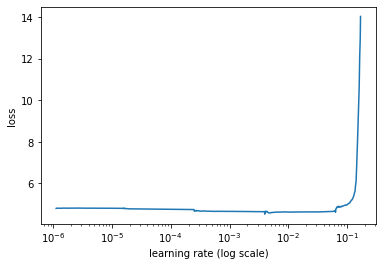

In [ ]:
convmixer_learner.lr_find(LR, WD)

In [ ]:
N_EPOCHS=100
LR=0.001
WD=0.001

In [ ]:
convmixer_learner.fit(n_epochs=N_EPOCHS, learning_rate=LR, weight_decay=WD)

Epoch 1/100
256/256 [==============================] - ETA: 0s - loss: 4.7175 - accuracy: 0.0214
Epoch 00001: saving model to /content/drive/MyDrive/MASTER IA VIU/DL/Act_parejas/training_data/convmixer_learner_1637133564/Models/exp_0001/weights/convmixer_learner_1637133564_weights.h5
256/256 [==============================] - 193s 667ms/step - loss: 4.7175 - accuracy: 0.0214 - val_loss: 4.8193 - val_accuracy: 0.0083 - lr: 0.0010
Epoch 2/100
256/256 [==============================] - ETA: 0s - loss: 4.4680 - accuracy: 0.0400
Epoch 00002: saving model to /content/drive/MyDrive/MASTER IA VIU/DL/Act_parejas/training_data/convmixer_learner_1637133564/Models/exp_0001/weights/convmixer_learner_1637133564_weights.h5
256/256 [==============================] - 170s 665ms/step - loss: 4.4680 - accuracy: 0.0400 - val_loss: 4.8339 - val_accuracy: 0.0103 - lr: 0.0010
Epoch 3/100
256/256 [==============================] - ETA: 0s - loss: 4.3062 - accuracy: 0.0561
Epoch 00003: saving model to /content

KeyboardInterrupt: ignored

Tras observar que las pérdidas de entrenamiento y validación, se ha decidido parar el entrenamiento y volver a comenzar con un valor de regularización mejor ya que daba la sensación de que el modelo no estaba siendo capaz de ajustar los pesos.

In [ ]:
N_EPOCHS=10
LR=0.001
WD=0.0001

Epoch 1/10
256/256 [==============================] - ETA: 0s - loss: 3.6558 - accuracy: 0.1282
Epoch 00001: saving model to /content/drive/MyDrive/MASTER IA VIU/DL/Act_parejas/training_data/convmixer_learner_1637133564/Models/exp_0002/weights/convmixer_learner_1637133564_weights.h5
256/256 [==============================] - 177s 672ms/step - loss: 3.6558 - accuracy: 0.1282 - val_loss: 25.3286 - val_accuracy: 0.0078 - lr: 0.0010
Epoch 2/10
256/256 [==============================] - ETA: 0s - loss: 3.5320 - accuracy: 0.1435
Epoch 00002: saving model to /content/drive/MyDrive/MASTER IA VIU/DL/Act_parejas/training_data/convmixer_learner_1637133564/Models/exp_0002/weights/convmixer_learner_1637133564_weights.h5
256/256 [==============================] - 172s 673ms/step - loss: 3.5320 - accuracy: 0.1435 - val_loss: 22.4171 - val_accuracy: 0.0127 - lr: 0.0010
Epoch 3/10
256/256 [==============================] - ETA: 0s - loss: 3.4629 - accuracy: 0.1518
Epoch 00003: saving model to /content/

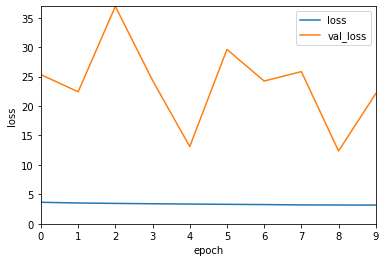

In [ ]:
convmixer_learner.fit(n_epochs=N_EPOCHS, learning_rate=LR, weight_decay=WD)

Tras probar distintos hiperpárametros, no se ha conseguido réplicar los resultados obtenidos en el paper. Sin embargo, también es importante recalcar que no se ha podido llevar a cabo un entrenamiento tan largo (150 epochs) para poder evaluar la arquitectura de forma cuantitativa. Bien es cierto, que el modelo tiende a minimizar las pérdidas, aunque todavía está muy lejos de conseguir resultados aceptables. Sin embargo, el aprendizaje adquirido durante todo el proceso de implementación de la misma, ha sido cuanto menos enriquecedor y ha merecido la pena optar por esta solución que apriori no era la más sencilla. 


## Pretrained Learner

La transferencia de aprendizaje consiste en aprovechar las _características_ (features) que se aprendieron en otro problema, para solucionar nuestro problema. 

Básicamente, explota la idea de que partiendo de unos pesos ya aprendidos y ajustados para detectar patrones en otro dominio similar, estaremos más cerca de encontrar unos pesos que se ajusten a nuestro dominio. Por lo tanto, reducimos en gran medida el tiempo de entrenamiento (búsqueda de pesos ideal) puesto que ya no partimos de pesos inicializados de manera aleatoria, si no que partimos de pesos ya pre-entrenados. 

Dada la naturaleza de los datos de entrada en temas de visión, y como se componen los filtros complejos (narices, ojos o bocas) a partir de filtros más simples (lineas, esquinas, texturas) de capas previas, la transferencia de aprendizaje es ideal.

El proceso común para llevar a cabo la transferencia de aprendizaje es:      
1. Coger el backend de un modelo pre-entrenado.
2. Añadir una head (ciertas capas nuevas) que nos permita ajustar nuestro problema.
3. Congelar el modelo pre-entrenado (backend), para evitar que sus filtros se entrenen.
4. Entrenar el modelo (sólo se entrenará la head, porque la otra parte estará congelada).
5. *Opcionalmente se puede llevar a cabo un _fine-tuning_: descongelar el modelo al completo y entrenarlo durante ciertas épocas con una tasa de aprendizaje más baja (normalmente). 

En las siguientes 2 secciones se llevará a cabo la transferencia de aprendizaje con dos modelos diferentes y se analizarán los resultados. Concretamente, los pasos 3, 4, y 5.

### 5.2.1 ResNet50V2 Pretrained Learner

In [ ]:
resnet50.model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 300, 300, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 300, 300, 3)      0         
 al)                                                             
                                                                 
 tf.math.truediv (TFOpLambda  (None, 300, 300, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 300, 300, 3)      0         
 a)                                                              
                                                                 
 resnet50v2 (Functional)     (None, 10, 10, 2048)      23564800  
                                                             

In [ ]:
learner_name='resnet50v2_learner'
monitoring_path=MYDRIVE_BASE_FOLDER
monitoring_path

'/content/drive/MyDrive/MASTER IA VIU/DL/Act_parejas'

In [ ]:
f'Utilizamos un batch size de: {dls.batch_size}'

'Utilizamos un batch size de: 32'

In [ ]:
resnet_learner = Learner(dataloaders=dls,
                         model=resnet50,
                         loss_function=loss_function,
                         optimizer=optimizer,
                         learner_name=learner_name,
                         monitoring_path=monitoring_path
                         )

1. Congelamos el modelo base para evitar que sus filtros se entrenen.

In [ ]:
resnet_learner.freeze()

2. Entrenamos la head hasta obtener buenos resultados de accuracy.

In [ ]:
LR=0.001
WD=0.0001

/usr/local/lib/python3.7/dist-packages/keras_lr_finder/lr_finder.py:100: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  **kw_fit)


Epoch 1/5
256/256 [==============================] - 75s 269ms/step - loss: 5.0681 - accuracy: 0.0093
Epoch 2/5
256/256 [==============================] - 69s 268ms/step - loss: 4.6072 - accuracy: 0.0439
Epoch 3/5
256/256 [==============================] - 68s 267ms/step - loss: 2.4192 - accuracy: 0.4372
Epoch 4/5
256/256 [==============================] - 62s 241ms/step - loss: 5.0720 - accuracy: 0.4843


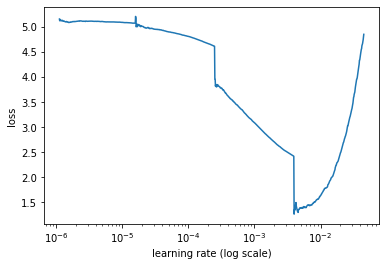

In [ ]:
resnet_learner.lr_find(LR, WD)

El criterio es escoger el learning rate con mayor pendiente antes de cambiar su tendencia a ascendente. [Más detalles.](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html)

In [ ]:
N_EPOCHS=15
LR=1e-3
WD=0.001

Epoch 1/15
256/256 [==============================] - ETA: 0s - loss: 2.3730 - accuracy: 0.4530
Epoch 00001: saving model to /content/drive/MyDrive/MASTER IA VIU/DL/Act_parejas/training_data/resnet50v2_learner_1637099469/Models/exp_0001/weights/resnet50v2_learner_1637099469_weights.h5
256/256 [==============================] - 93s 342ms/step - loss: 2.3730 - accuracy: 0.4530 - val_loss: 1.0256 - val_accuracy: 0.7521 - lr: 0.0010
Epoch 2/15
256/256 [==============================] - ETA: 0s - loss: 1.1466 - accuracy: 0.7087
Epoch 00002: saving model to /content/drive/MyDrive/MASTER IA VIU/DL/Act_parejas/training_data/resnet50v2_learner_1637099469/Models/exp_0001/weights/resnet50v2_learner_1637099469_weights.h5
256/256 [==============================] - 87s 341ms/step - loss: 1.1466 - accuracy: 0.7087 - val_loss: 0.8173 - val_accuracy: 0.7848 - lr: 0.0010
Epoch 3/15
256/256 [==============================] - ETA: 0s - loss: 0.9876 - accuracy: 0.7494
Epoch 00003: saving model to /content/

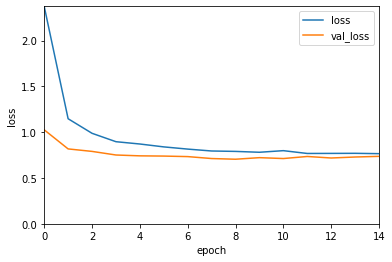

In [ ]:
resnet_learner.fit(N_EPOCHS, LR, WD)

Como podemos observar, el valor de pérdidas sobre train es mayor que sobre validation. Esto puede deberse al hecho de que estamos sólamente aplicando data augmentation sobre el conjunto de train, es decir, la tarea de clasificación de razas en train puede parecer más compleja ya que las imágenes están ligeramente modificadas y éstas no se dan en el conjunto de validación.

Además, hemos conseguido ajustar el conjunto de entrenamiento para conseguir un accuracy alrededor del 0.80 en validación. Sin embargo, parece que la curva de aprendizaje ya no mejora. Para intentar mejorar los resultados de nuestro modelo, se podría a llevar a cabo un fine tuning.

3. Descongelamos el modelo base y entrenamos todo el modelo para ver si conseguimos mejorar el accuracy. Para evitar que los filtros del modelo base cambien drásticamente, escogemos un valor de learning rate más bajo. Lo ideal sería implementar un learning rate diferencial, esto es que el learning rate de las primeras capas tome un valor bajo y fuese incrementandose a medida que nos acercamos a las capas de la head (basado en el mismo paper de Leslie N. Smith). Sin embargo, por motivos de tiempo, recursos disponibles y como los resultados son bastante buenos, no se va a llevar a cabo en esta práctica.

 ### 5.2.2 Xception Pretrained Learner


In [ ]:
xception.model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 300, 300, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 300, 300, 3)      0         
 al)                                                             
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 300, 300, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 300, 300, 3)      0         
 bda)                                                            
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                           

In [ ]:
learner_name='xception_learner'
monitoring_path=MYDRIVE_BASE_FOLDER
monitoring_path

'/content/drive/MyDrive/MASTER IA VIU/DL/Act_parejas'

In [ ]:
f'Utilizamos un batch size de: {dls.batch_size}'

'Utilizamos un batch size de: 32'

In [ ]:
xception_learner = Learner(dataloaders=dls,
                           model=xception,
                           loss_function=loss_function,
                           optimizer=optimizer,
                           learner_name=learner_name, 
                           monitoring_path=monitoring_path)

1. Congelamos el modelo base para evitar que sus filtros se entrenen.

In [ ]:
xception_learner.freeze()

2. Entrenamos la head hasta obtener buenos resultados de accuracy.

In [ ]:
LR=0.001
WD=0.0001

/usr/local/lib/python3.7/dist-packages/keras_lr_finder/lr_finder.py:100: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  **kw_fit)


Epoch 1/5
256/256 [==============================] - 85s 318ms/step - loss: 4.8323 - accuracy: 0.0116
Epoch 2/5
256/256 [==============================] - 82s 319ms/step - loss: 4.4623 - accuracy: 0.1345
Epoch 3/5
256/256 [==============================] - 82s 318ms/step - loss: 1.9843 - accuracy: 0.7049
Epoch 4/5
256/256 [==============================] - 82s 318ms/step - loss: 1.9699 - accuracy: 0.6878
Epoch 5/5
256/256 [==============================] - 2s 8ms/step - loss: 5.7920 - accuracy: 0.6250


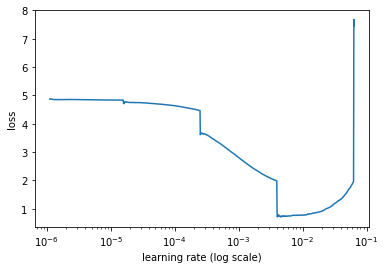

In [ ]:
xception_learner.lr_find(LR, WD)

In [ ]:
N_EPOCHS=15
LR=1e-3
WD=0.001

Epoch 1/15
256/256 [==============================] - ETA: 0s - loss: 1.8075 - accuracy: 0.6604
Epoch 00001: saving model to /content/drive/MyDrive/MASTER IA VIU/DL/Act_parejas/training_data/xception_learner_1637101296/Models/exp_0001/weights/xception_learner_1637101296_weights.h5
256/256 [==============================] - 107s 404ms/step - loss: 1.8075 - accuracy: 0.6604 - val_loss: 0.5563 - val_accuracy: 0.8880 - lr: 0.0010
Epoch 2/15
256/256 [==============================] - ETA: 0s - loss: 0.8036 - accuracy: 0.8041
Epoch 00002: saving model to /content/drive/MyDrive/MASTER IA VIU/DL/Act_parejas/training_data/xception_learner_1637101296/Models/exp_0001/weights/xception_learner_1637101296_weights.h5
256/256 [==============================] - 103s 401ms/step - loss: 0.8036 - accuracy: 0.8041 - val_loss: 0.4418 - val_accuracy: 0.9027 - lr: 0.0010
Epoch 3/15
256/256 [==============================] - ETA: 0s - loss: 0.6979 - accuracy: 0.8278
Epoch 00003: saving model to /content/drive/

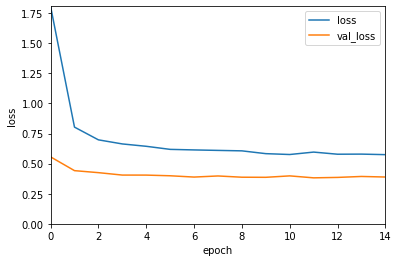

In [ ]:
xception_learner.fit(N_EPOCHS, LR, WD)

Como podemos observar, el valor de pérdidas sobre train es mayor que sobre validation. De igual forma que en el caso de la ResNet, esto puede deberse al hecho de que estamos sólamente aplicando data augmentation sobre el conjunto de train, es decir, la tarea de clasificación de razas en train puede parecer más compleja ya que las imágenes están ligeramente modificadas y éstas no se dan en el conjunto de validación.

Por otra parte, podríamos pensar que no estamos consiguiendo ajustar correctamente el modelo (underfitting). Podríamos tratar de mejorarlo por ejemplo, ampliando el tamaño de la imágen de entrada, para obtener mayor resolución de entrada al modelo. Además, podríamos probar a bajar más el término de regularización como weight decay.

Además, hemos conseguido ajustar el conjunto de entrenamiento para conseguir un accuracy alrededor del 0.90 en validación. Sin embargo, parece que la curva de aprendizaje ya no mejora. Para intentar mejorar los resultados de nuestro modelo, se podría a llevar a cabo un fine tuning.

Por último, mencionar que dados los resultados obtenidos, nos quedamos con la solución basada en __Xception (>0.9 accuracy en validation)__ por encima de ResNet(0.79 accuracy en validation).

# **Evaluación** final y reflexiones.

Aunque en los distintos apartados de este documento se mencionan y justifican las decisiones tomadas. LLegados a este punto, donde se han probado y demostrado distintos enfoques, es importante destacar algunos de los conocimientos y objetivos conseguidos:     
- Evidenciar la capacidad de la transferencia de aprendizaje en visión. Su uso se traduce en mejores resultados en menos tiempo.
- Se han desarrollado distintas clases que han permitido agilizar la prueba y error.
- Se ha desarrollado y probado una arquitectura from scratch inspirada en ConvMixer (SOTA). Cabe mencionar que los resultados no han sido los esperados a priori, pero el aprendizaje durante el proceso (lectura, análisis e implementación del paper) ha merecido la pena y ha sido muy enriquecedora.
- Se ha documentado y justificado el uso de cada componente (arquitectura, optimizador, hiperparámetro, función de pérdidas... etc).
- Se ha desarrollado un data generator para cargar las imágenes.
- Se ha implmentado un pipeline de data augmentation.
 

# Bibliografía adicional

*   https://www.kaggle.com/mpalermo/keras-pipeline-custom-generator-imgaug
*   https://www.tensorflow.org/tutorials/load_data/images
*   https://www.kaggle.com/masrur007/resnet50-and-cnn-from-scratch-dog-breed-classify
* https://www.tensorflow.org/guide/keras/transfer_learning
* https://stackoverflow.com/questions/52588552/google-co-laboratory-notebook-pdf-download